In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS_Dhoni_ODI_record.csv')

In [ ]:
2b# @title { vertical-output: true}
print(df.head())
print(df.tail())

  score runs_scored balls_faced strike_rate fours sixes    opposition  \
0     0           0           1           0     0     0  v Bangladesh   
1    12          12          11      109.09     2     0  v Bangladesh   
2    7*           7           2         350     0     1  v Bangladesh   
3     3           3           7       42.85     0     0    v Pakistan   
4   148         148         123      120.32    15     4    v Pakistan   

          ground        date  odi_number  
0     Chattogram  23/12/2004  ODI # 2199  
1          Dhaka  26/12/2004  ODI # 2201  
2          Dhaka  27/12/2004  ODI # 2202  
3          Kochi  02/04/2005  ODI # 2235  
4  Visakhapatnam  05/04/2005  ODI # 2236  
    score runs_scored balls_faced strike_rate fours sixes     opposition  \
345   56*          56          61        91.8     3     2  v West Indies   
346   42*          42          31      135.48     4     1      v England   
347    35          35          33      106.06     4     0   v Bangladesh   

In [ ]:
# @title { vertical-output: true}
# Data cleaninng
# df['opposition'] = df['opposition'].apply(lambda x : x[2:])
df['opposition'] = df['opposition'].str.replace('v', '', regex=False)
df['opposition']

,opposition
0,Bangladesh
1,Bangladesh
2,Bangladesh
3,Pakistan
4,Pakistan
...,...
345,West Indies
346,England
347,Bangladesh
348,Sri Lanka


In [ ]:
# @title { vertical-output: true}
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['year'] = df['date'].dt.year.astype(int)
print(df['year'])

0      2004
1      2004
2      2004
3      2005
4      2005
       ... 
345    2019
346    2019
347    2019
348    2019
349    2019
Name: year, Length: 350, dtype: int64


In [ ]:
# @title { vertical-output: true}
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'), 1, 0)
print(df.head())

  score runs_scored balls_faced strike_rate fours sixes   opposition  \
0     0           0           1           0     0     0   Bangladesh   
1    12          12          11      109.09     2     0   Bangladesh   
2    7*           7           2         350     0     1   Bangladesh   
3     3           3           7       42.85     0     0     Pakistan   
4   148         148         123      120.32    15     4     Pakistan   

          ground       date  odi_number  year  not_out  
0     Chattogram 2004-12-23  ODI # 2199  2004        0  
1          Dhaka 2004-12-26  ODI # 2201  2004        0  
2          Dhaka 2004-12-27  ODI # 2202  2004        1  
3          Kochi 2005-04-02  ODI # 2235  2005        0  
4  Visakhapatnam 2005-04-05  ODI # 2236  2005        0  


In [ ]:
# @title { vertical-output: true}
df.drop(columns=['odi_number'], inplace=True)
print(df.head())

  score runs_scored balls_faced strike_rate fours sixes   opposition  \
0     0           0           1           0     0     0   Bangladesh   
1    12          12          11      109.09     2     0   Bangladesh   
2    7*           7           2         350     0     1   Bangladesh   
3     3           3           7       42.85     0     0     Pakistan   
4   148         148         123      120.32    15     4     Pakistan   

          ground       date  year  not_out  
0     Chattogram 2004-12-23  2004        0  
1          Dhaka 2004-12-26  2004        0  
2          Dhaka 2004-12-27  2004        1  
3          Kochi 2005-04-02  2005        0  
4  Visakhapatnam 2005-04-05  2005        0  


In [ ]:
# @title { vertical-output: true}
df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')) , 'runs_scored':]
print(df_new)

    runs_scored balls_faced strike_rate fours sixes    opposition  \
0             0           1           0     0     0    Bangladesh   
1            12          11      109.09     2     0    Bangladesh   
2             7           2         350     0     1    Bangladesh   
3             3           7       42.85     0     0      Pakistan   
4           148         123      120.32    15     4      Pakistan   
..          ...         ...         ...   ...   ...           ...   
344          28          52       53.84     3     0   Afghanistan   
345          56          61        91.8     3     2   West Indies   
346          42          31      135.48     4     1       England   
347          35          33      106.06     4     0    Bangladesh   
349          50          72       69.44     1     1   New Zealand   

            ground       date  year  not_out  
0       Chattogram 2004-12-23  2004        0  
1            Dhaka 2004-12-26  2004        0  
2            Dhaka 2004-12-27 

In [ ]:
# @title { vertical-output: true}
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)

In [ ]:
# @title { vertical-output: true}
first_match_date = df['date'].dt.date.min().strftime('%B %d %Y') # First match
print('first_match_date',first_match_date)

last_match_date = df['date'].dt.date.max().strftime('%B %d %Y') # Last match
print('last_match_date',last_match_date)

number_of_matches = df.shape[0] # Number of matches played in the career
print('number_of_matches',number_of_matches)

first_match_date December 23 2004
last_match_date July 09 2019
number_of_matches 350


In [ ]:
# @title { vertical-output: true}
number_of_inns = df_new.shape[0] # Number of innings
print('number_of_inns',number_of_inns)

not_outs = df_new['not_out'].sum() # Number of not outs
print('not_outs',not_outs)

runs_scored = df_new['runs_scored'].sum() # Total runs scored
print('runs_scored',runs_scored)

balls_faced = df_new['balls_faced'].sum() # Total balls faced
print('balls_faced',balls_faced)

number_of_inns 297
not_outs 84
runs_scored 10773
balls_faced 12303


In [ ]:
# @title { vertical-output: true}
career_sr = (runs_scored / balls_faced) * 100 # Career stike rate
print('career_sr',career_sr)

career_avg = runs_scored / (number_of_inns - not_outs) # Career average
print('career_avg: {:.2f}'.format(career_avg))

career_sr 87.56400877834675
career_avg: 50.58


In [ ]:
# @title { vertical-output: true}
hundreds = (df_new['runs_scored'] >= 100).sum() # Number of centuries
print('hundreds',hundreds)

fifties = ((df_new['runs_scored'] >= 50) & (df_new['runs_scored'] < 100)).sum() # Number of half-centuries
print('fifties',fifties)

fours = df_new['fours'].sum() # Number of fours
print('fours',fours)

sixes = df_new['sixes'].sum() # Number of sixes
print('sixes',sixes)

hundreds 10
fifties 73
fours 826
sixes 229


opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


Text(0, 0.5, 'Number of matches')

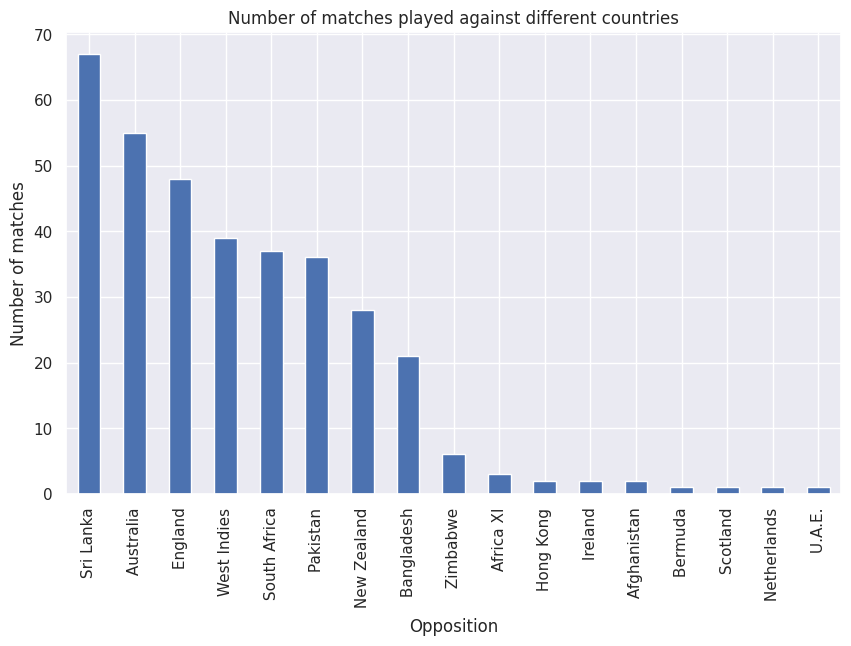

In [ ]:
#@title { vertical-output: true}

# Numbers of matches played against different countries
# Count the occurances of each unique value in 'opposition' volumn
# opposition_count will be a series withlabelled index as opposition

opposition_count = df['opposition'].value_counts()
print(opposition_count)

# Plor the count as a bar plot
opposition_count.plot(kind='bar', title='Number of matches played against different countries', figsize=(10, 6))
plt.xlabel('Opposition')
plt.ylabel('Number of matches')

     runs_scored  balls_faced  strike_rate  fours  sixes    opposition  \
0              0            1         0.00      0      0    Bangladesh   
1             12           11       109.09      2      0    Bangladesh   
2              7            2       350.00      0      1    Bangladesh   
3              3            7        42.85      0      0      Pakistan   
4            148          123       120.32     15      4      Pakistan   
..           ...          ...          ...    ...    ...           ...   
204           21           11       190.90      2      0    Bangladesh   
259           85           76       111.84      8      2      Zimbabwe   
321            0            3         0.00      0      0     Hong Kong   
325            8           17        47.05      0      0   Afghanistan   
344           28           52        53.84      3      0   Afghanistan   

            ground       date  year  not_out  
0       Chattogram 2004-12-23  2004        0  
1            Dhak

Text(0, 0.5, 'Runs scored')

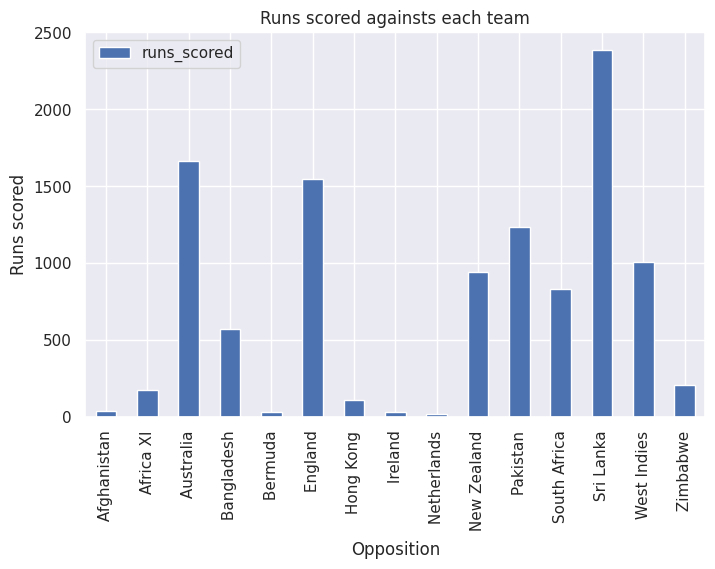

In [ ]:
#@title { vertical-output: true}

# Runs scored againsts each team
# Group the dataframe opposition column
grouped_by_opposition = df_new.groupby('opposition')
print(grouped_by_opposition.head(10))

# Calculate the sum of runs_scored for each opposition
sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)

# sum_of_runs_scored is a series with a labelled index, which is opposition
run_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()
print(run_scored_by_opposition)

run_scored_by_opposition.plot(kind='bar', x='opposition', y='runs_scored', title='Runs scored againsts each team', figsize=(8, 5))
plt.xlabel('Opposition')
plt.ylabel('Runs scored')

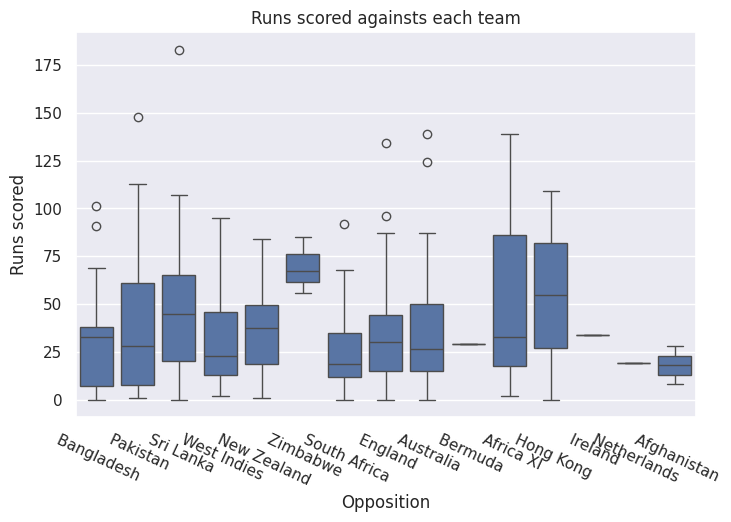

In [ ]:
#@title { vertical-output: true}
plt.figure(figsize=(8, 5))
sns.boxplot(x='opposition', y='runs_scored', data=df_new)
plt.xticks(rotation=-25)
plt.xlabel('Opposition')
plt.ylabel('Runs scored')
plt.title('Runs scored againsts each team')
plt.show()

In [ ]:
# @title { vertical-output: true}
# Plot looks crowded - so filter only major country
opposition_list = df_new['opposition'].value_counts()[df_new['opposition'].value_counts() > 10].index.tolist()
print(opposition_list)

[' Sri Lanka', ' Australia', ' England', ' West Indies', ' South Africa', ' Pakistan', ' New Zealand', ' Bangladesh']


In [ ]:
# @title { vertical-output: true}
# Filtering the rows where team exits
df_filtered = df_new[df_new['opposition'].isin(opposition_list)]
print(df_filtered.head(5))

   runs_scored  balls_faced  strike_rate  fours  sixes   opposition  \
0            0            1         0.00      0      0   Bangladesh   
1           12           11       109.09      2      0   Bangladesh   
2            7            2       350.00      0      1   Bangladesh   
3            3            7        42.85      0      0     Pakistan   
4          148          123       120.32     15      4     Pakistan   

          ground       date  year  not_out  
0     Chattogram 2004-12-23  2004        0  
1          Dhaka 2004-12-26  2004        0  
2          Dhaka 2004-12-27  2004        1  
3          Kochi 2005-04-02  2005        0  
4  Visakhapatnam 2005-04-05  2005        0  


In [ ]:
# @title { vertical-output: true}
# Sorting based on runs scored
df_filtered = df_filtered.sort_values(by='runs_scored', ascending=False)
print(df_filtered.head(5))

     runs_scored  balls_faced  strike_rate  fours  sixes  opposition  \
21           183          145       126.20     15     10   Sri Lanka   
4            148          123       120.32     15      4    Pakistan   
228          139          121       114.87     12      5   Australia   
284          134          122       109.83     10      6     England   
146          124          107       115.88      9      3   Australia   

            ground       date  year  not_out  
21          Jaipur 2005-10-31  2005        1  
4    Visakhapatnam 2005-04-05  2005        0  
228         Mohali 2013-10-19  2013        1  
284        Cuttack 2017-01-19  2017        0  
146         Nagpur 2009-10-28  2009        0  


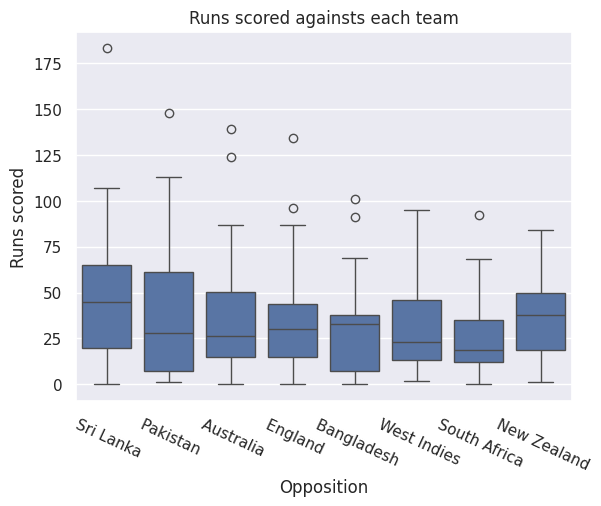

In [ ]:
# @title { vertical-output: true}
# Redrew boxplot but on filtered opposition list
sns.boxplot(x='opposition', y='runs_scored', data=df_filtered)
plt.xticks(rotation=-25)
plt.xlabel('Opposition')
plt.ylabel('Runs scored')
plt.title('Runs scored againsts each team')
plt.show()

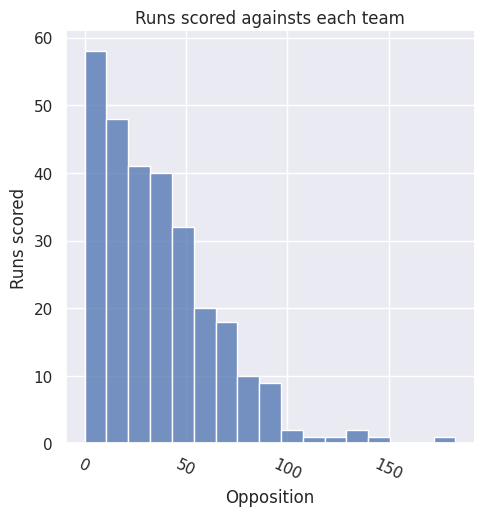

In [ ]:
# @title { vertical-output: true}
# Redrew histogram but on filtered opposition list
sns.displot(x='runs_scored', data=df_filtered, kde=False)
plt.xticks(rotation=-25)
plt.xlabel('Opposition')
plt.ylabel('Runs scored')
plt.title('Runs scored againsts each team')
plt.show()

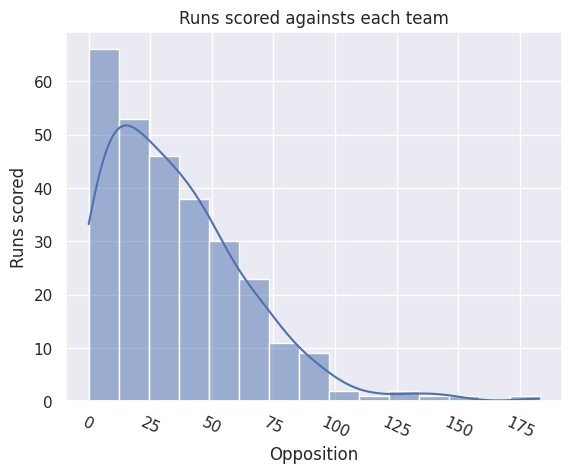

In [ ]:
# @title { vertical-output: true}
# Redrew histogram bins but on filtered opposition list
sns.set(style='darkgrid')
sns.histplot(x='runs_scored', data=df_filtered, bins=15, kde=True)
plt.xticks(rotation=-25)
plt.xlabel('Opposition')
plt.ylabel('Runs scored')
plt.title('Runs scored againsts each team')
plt.show()

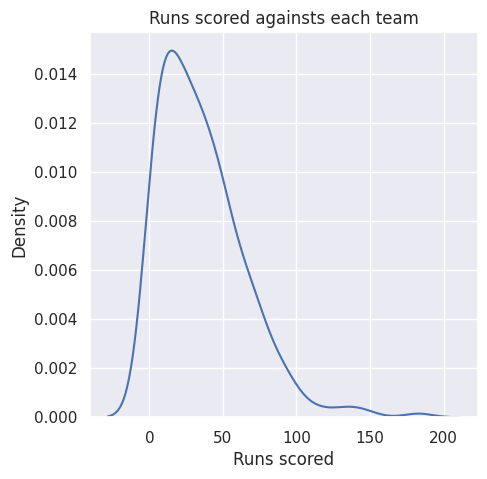

In [ ]:
# @title { vertical-output: true}
# Redrew kde plot but on filtered opposition list
plt.figure(figsize=(5, 5))
sns.set(style='darkgrid')
sns.kdeplot(x='runs_scored', data=df_filtered)
plt.xlabel('Runs scored')
plt.ylabel('Density')
plt.title('Runs scored againsts each team')
plt.show()

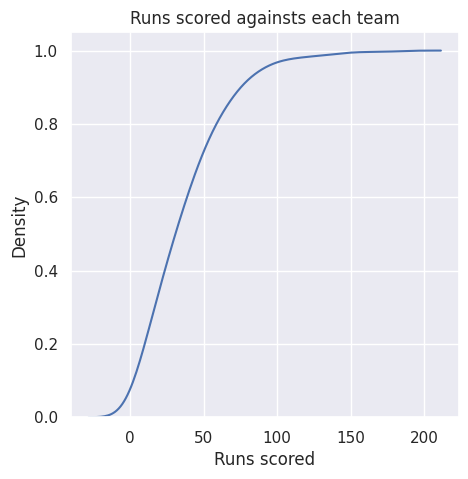

In [ ]:
# @title { vertical-output: true}
# kde plot - with cumlative property
plt.figure(figsize=(5, 5))
sns.set(style='darkgrid')
sns.kdeplot(x='runs_scored', data=df_filtered, cumulative=True)
plt.xlabel('Runs scored')
plt.ylabel('Density')
plt.title('Runs scored againsts each team')
plt.show()

<Figure size 640x480 with 0 Axes>

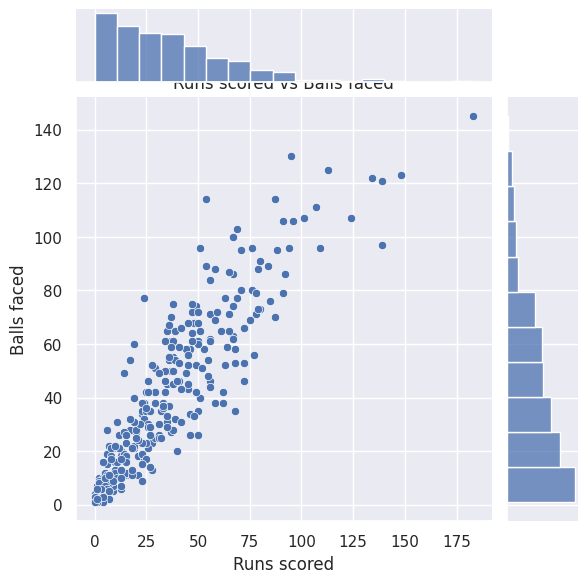

In [ ]:
# @title { vertical-output: true}
# Scatter plot - joint plot of runs vs balls faced
plt.figure()
sns.jointplot(x='runs_scored', y='balls_faced', data=df_new, kind='scatter')
plt.xlabel('Runs scored')
plt.ylabel('Balls faced')
plt.title('Runs scored vs Balls faced')
plt.show()


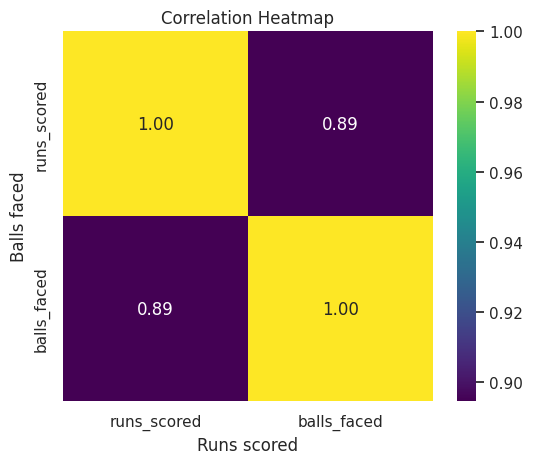

In [ ]:
# @title { vertical-output: true}
# Heatmap of Ball faced vs runs scored
correlation_matrix = df_new[['runs_scored', 'balls_faced']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', square=True, fmt=".2f")
plt.xlabel('Runs scored')
plt.ylabel('Balls faced')
plt.title('Correlation Heatmap')
plt.show()

      opposition  runs_scored  balls_faced  strike_rate
0      Australia         1660         2052    80.896686
1     Bangladesh          569          682    83.431085
2        England         1546         1758    87.940842
3    New Zealand          940         1140    82.456140
4       Pakistan         1231         1361    90.448200
5   South Africa          830          950    87.368421
6      Sri Lanka         2383         2645    90.094518
7    West Indies         1005         1108    90.703971


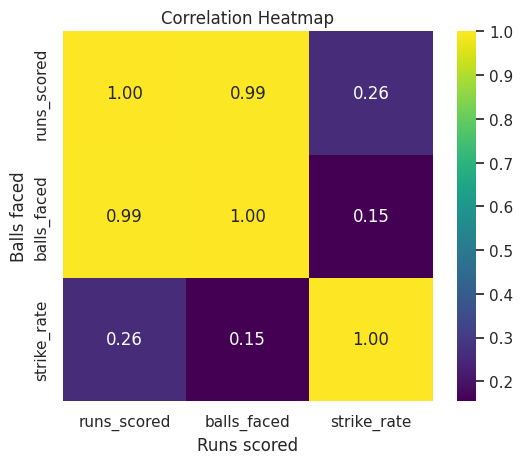

In [ ]:
# @title { vertical-output: true}
# Heatmap of Ball faced vs runs scored vs strike rate for countywise

df_new_strike = df_filtered.copy()
df_new_strike = df_new_strike.groupby(['opposition']).agg({'runs_scored': 'sum', 'balls_faced': 'sum'}).reset_index()
df_new_strike['strike_rate'] = (df_new_strike['runs_scored'] / df_new_strike['balls_faced']) * 100

print(df_new_strike)
plt.figure()
numeric_df = df_new_strike[['runs_scored', 'balls_faced', 'strike_rate']].corr()
sns.heatmap(numeric_df, annot=True, cmap='viridis', square=True, fmt=".2f")
plt.xlabel('Runs scored')
plt.ylabel('Balls faced')
plt.title('Correlation Heatmap')
plt.show()

              balls_faced  runs_scored  strike_rate
opposition                                         
Australia            2052         1660    80.896686
Bangladesh            682          569    83.431085
England              1758         1546    87.940842
New Zealand          1140          940    82.456140
Pakistan             1361         1231    90.448200
South Africa          950          830    87.368421
Sri Lanka            2645         2383    90.094518
West Indies          1108         1005    90.703971


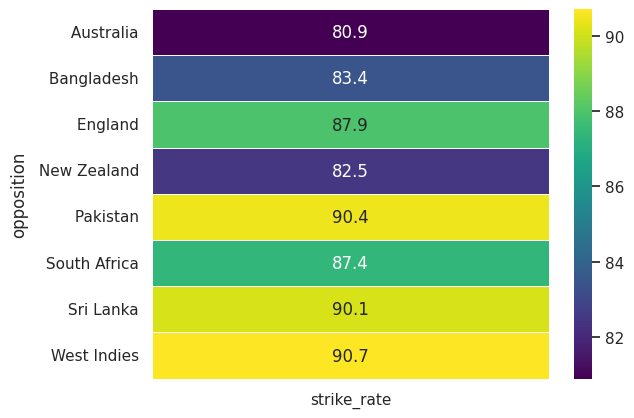

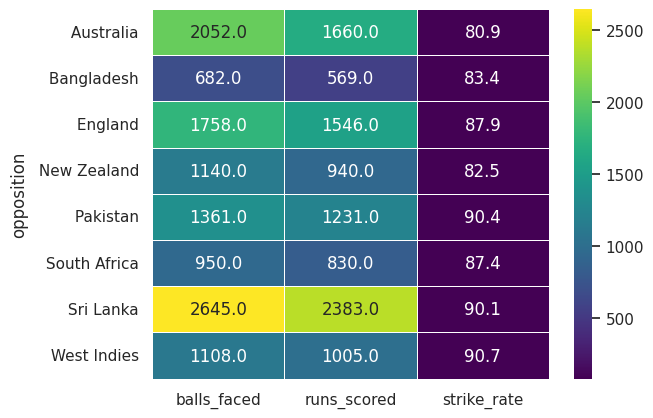

In [ ]:
# @title { vertical-output: true}

grouped_by_opposition = df_filtered.groupby('opposition')
df_strike_rate =  df_filtered.groupby('opposition').agg({'balls_faced': 'sum', 'runs_scored': 'sum'})
df_strike_rate['strike_rate'] = (df_strike_rate['runs_scored'] / df_strike_rate['balls_faced']) * 100
print(df_strike_rate)

plt.figure()
sns.heatmap(df_strike_rate[['strike_rate']], linewidth=0.5, annot=True, fmt='.1f', cmap='viridis')
plt.show()


plt.figure()
sns.heatmap(df_strike_rate[['balls_faced', 'runs_scored', 'strike_rate']], linewidth=0.5, annot=True, fmt='.1f', cmap='viridis')
plt.show()


<Figure size 640x480 with 0 Axes>

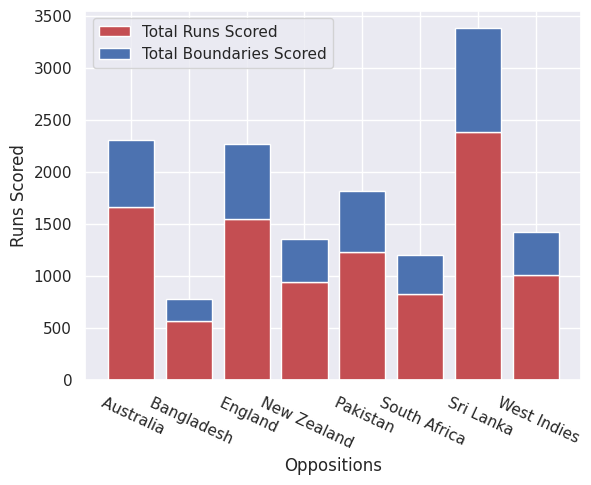

In [ ]:
# @title { vertical-output: true}

# Run scdored in boundaries (4*No. of 4's and  6*No. of 6's)
df_new['boundaries'] = (df_new['fours'] * 4) + (df_new['sixes'] * 6)
plt.figure()

grouped_by_opposition = df_filtered.groupby('opposition')
df_boundaries =  df_filtered.groupby('opposition').agg({'runs_scored': 'sum', 'fours' : 'sum', 'sixes' : 'sum'})
df_boundaries['boundaries'] = (df_boundaries['fours'] * 4) + (df_boundaries['sixes'] * 6)

df_boundaries.reset_index(inplace=True)

plt.figure()
plt.bar(df_boundaries['opposition'], df_boundaries.runs_scored	, color='r')
plt.bar(df_boundaries['opposition'], df_boundaries.boundaries, bottom=df_boundaries.runs_scored, color='b')
plt.xticks(rotation=-25)
plt.xlabel('Oppositions')
plt.ylabel('Runs Scored')
plt.legend(['Total Runs Scored','Total Boundaries Scored'])
plt.show()